In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import fnmatch
import tensorflow as tf
from time import sleep
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as k
import matplotlib.image as mpimg
import os
from tensorflow.keras import layers 
from tensorflow.keras import Model

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.rcParams['figure.figsize'] = (12,7)

In [3]:
# Setting paths and showing the number of images
falciparum = os.listdir("final_dataset1/Falciparum")
falciparum_path = "final_dataset1/Falciparum"
print("Length of falciparum data = ", len(falciparum), 'images')
vivax = os.listdir("final_dataset1/Vivax")
vivax_path = "final_dataset1/Vivax"
print("Length of vivax data = ", len(vivax), 'images')
uninfected = os.listdir("final_dataset1/Uninfected")
uninfected_path = "final_dataset1/Uninfected"
print("Length of uninfected data = ", len(uninfected), 'images')


Length of falciparum data =  965 images
Length of vivax data =  965 images
Length of uninfected data =  965 images


In [4]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg19 import preprocess_input

# Define function for sharpening images
def sharpen_image(image):
    # Define sharpening kernel
    kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])
    # Apply sharpening filter
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

# Define function for noise removal using Gaussian blur
def remove_noise(image):
    # Apply Gaussian blur with a kernel size of (5,5)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image

# Preprocess function combining sharpening and noise removal
def preprocess_image(image):
    # Apply sharpening
    sharpened_image = sharpen_image(image)
    # Apply noise removal
    denoised_image = remove_noise(sharpened_image)
    # Preprocess for VGG19 (resize and normalize)
    preprocessed_image = preprocess_input(denoised_image)
    return preprocessed_image

# Example usage:
# Load and preprocess image
image = cv2.imread('final_dataset1/Falciparum/Falciparum-IMG_20150601_152941.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
preprocessed_image = preprocess_image(image)

# Now 'preprocessed_image' can be fed into the VGG19 model for inference


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


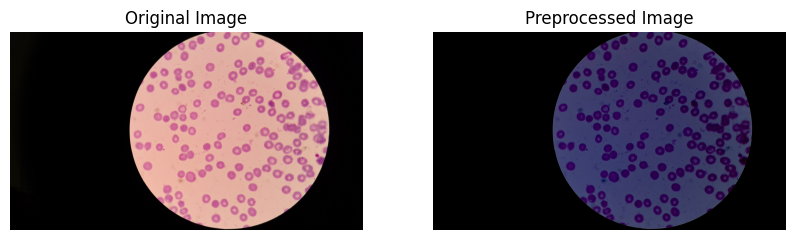

In [5]:
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Preprocessed image
plt.subplot(1, 2, 2)
# Since preprocess_input function normalizes the image, we need to rescale it to [0, 1] range before displaying
plt.imshow(preprocessed_image / 255.0)
plt.title('Preprocessed Image')
plt.axis('off')

plt.show()

In [6]:
import os

# Directory containing your dataset
dataset_dir = 'final_dataset1'
# Directory to save preprocessed images
preprocessed_dir = 'preprocessed_dataset'

# Create preprocessed directory if it doesn't exist
if not os.path.exists(preprocessed_dir):
    os.makedirs(preprocessed_dir)

# Function to process entire dataset
def preprocess_dataset(dataset_dir, preprocessed_dir):
    # Iterate through all subdirectories (categories) in the dataset
    for category in os.listdir(dataset_dir):
        category_dir = os.path.join(dataset_dir, category)
        # Create subdirectory in preprocessed_dir for this category
        preprocessed_category_dir = os.path.join(preprocessed_dir, category)
        if not os.path.exists(preprocessed_category_dir):
            os.makedirs(preprocessed_category_dir)
        # Iterate through all images in the category directory
        for filename in os.listdir(category_dir):
            # Load image
            image_path = os.path.join(category_dir, filename)
            image = cv2.imread(image_path)
            if image is not None:
                # Convert to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # Preprocess image
                preprocessed_image = preprocess_image(image)
                # Save preprocessed image
                preprocessed_image_path = os.path.join(preprocessed_category_dir, filename)
                cv2.imwrite(preprocessed_image_path, preprocessed_image)
                print(f"Processed: {image_path} -> {preprocessed_image_path}")
            else:
                print(f"Error: Unable to read {image_path}")

# Preprocess the dataset
preprocess_dataset(dataset_dir, preprocessed_dir)


Processed: final_dataset1\Falciparum\Falciparum-IMG_20150601_152941.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150601_152941.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150601_155125.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150601_155125.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150601_155642.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150601_155642.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150602_111510.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150602_111510.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150602_112011.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150602_112011.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150604_114631.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150604_114631.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150604_114730.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150604_114730.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20150622_110115.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150622_110115.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150622_110352.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150622_110352.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150623_134426.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150623_134426.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150623_134547.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150623_134547.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150623_134751.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150623_134751.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150623_134919.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150623_134919.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150623_135251.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150623_135251.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20150728_153328.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150728_153328.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150728_153413.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150728_153413.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150728_155921.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150728_155921.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150728_160256.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150728_160256.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150729_104027.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150729_104027.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150729_110134.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150729_110134.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150729_110305.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150729_110305.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20150815_172902.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150815_172902.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150817_102702.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150817_102702.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150817_102823.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150817_102823.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150817_103139.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150817_103139.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150817_103303.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150817_103303.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150817_103901.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150817_103901.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150817_110348.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150817_110348.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20150818_164008.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150818_164008.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150818_164408.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150818_164408.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150818_164702.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150818_164702.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150819_115417.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150819_115417.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150819_115955.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150819_115955.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150819_121053.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150819_121053.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150819_121240.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150819_121240.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20150821_162641.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150821_162641.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150821_162901.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150821_162901.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150821_163452.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150821_163452.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150821_163640.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150821_163640.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150821_163815.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150821_163815.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150821_165118.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150821_165118.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150821_165519.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150821_165519.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20150918_172053.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150918_172053.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150918_172214.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150918_172214.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150924_094800.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150924_094800.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150924_094944.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150924_094944.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150924_095034.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150924_095034.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150924_095130.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150924_095130.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150924_095633.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150924_095633.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20150930_162038.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150930_162038.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150930_162315.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150930_162315.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150930_163018.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150930_163018.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150930_163156.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150930_163156.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150930_171219.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150930_171219.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150930_171448.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150930_171448.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20150930_171558.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20150930_171558.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20151004_104813.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151004_104813.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151004_111220.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151004_111220.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151004_111436.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151004_111436.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151004_111526.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151004_111526.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151004_111651.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151004_111651.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151004_111755.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151004_111755.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151004_130408.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151004_130408.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20151005_171332.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151005_171332.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151005_171940.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151005_171940.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151005_172643.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151005_172643.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151005_182257.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151005_182257.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151005_182410.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151005_182410.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151005_182527.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151005_182527.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151005_182822.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151005_182822.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20151029_163959.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151029_163959.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151029_164033.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151029_164033.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151029_164218.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151029_164218.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151029_164248.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151029_164248.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151029_164451.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151029_164451.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151106_105437.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151106_105437.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151106_105834.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151106_105834.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20151106_160515.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151106_160515.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151106_160653.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151106_160653.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_103809.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_103809.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_104118.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_104118.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_104240.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_104240.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_104410.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_104410.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_104708.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_104708.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_162843.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_162843.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_162909.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_162909.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_162940.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_162940.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_163036.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_163036.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_164625.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_164625.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_164723.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_164723.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151112_164834.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151112_164834.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20151115_151211.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151115_151211.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151115_153831.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151115_153831.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151115_154022.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151115_154022.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151115_154313.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151115_154313.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151115_154435.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151115_154435.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151115_155104.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151115_155104.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151115_162818.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151115_162818.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20151118_154651.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151118_154651.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151118_155802.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151118_155802.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151118_160516.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151118_160516.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151118_163539.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151118_163539.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151118_172913.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151118_172913.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151118_173039.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151118_173039.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151119_115918.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151119_115918.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20151127_155722.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151127_155722.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151127_155914.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151127_155914.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151127_160434.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151127_160434.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151127_160514.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151127_160514.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151127_160539.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151127_160539.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151130_115339.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151130_115339.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151130_115733.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151130_115733.jpg
Proces

Processed: final_dataset1\Falciparum\Falciparum-IMG_20151203_103326.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151203_103326.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151203_103637.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151203_103637.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151203_110344.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151203_110344.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151203_110448.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151203_110448.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151203_110817.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151203_110817.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151203_110933.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151203_110933.jpg
Processed: final_dataset1\Falciparum\Falciparum-IMG_20151203_111121.jpg -> preprocessed_dataset\Falciparum\Falciparum-IMG_20151203_111121.jpg
Proces

Processed: final_dataset1\Uninfected\Uninfected-20170728_212559.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170728_212559.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170728_212707.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170728_212707.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170728_212831.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170728_212831.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170728_213000.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170728_213000.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170728_213111.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170728_213111.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170728_213310.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170728_213310.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170728_213455.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170728_213455.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170728_21393

Processed: final_dataset1\Uninfected\Uninfected-20170807_111711.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170807_111711.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170807_111812.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170807_111812.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170807_112008.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170807_112008.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170807_112206.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170807_112206.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170807_112417.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170807_112417.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170807_112543.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170807_112543.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170807_112646.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170807_112646.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170807_11264

Processed: final_dataset1\Uninfected\Uninfected-20170816_112056.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_112056.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_112257.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_112257.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_112504.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_112504.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_112850.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_112850.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_112945.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_112945.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_113038.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_113038.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_113546.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_113546.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_11372

Processed: final_dataset1\Uninfected\Uninfected-20170816_142237.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_142237.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_142349.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_142349.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_143247.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_143247.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_143356.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_143356.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_143506.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_143506.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_143712.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_143712.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_143817.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_143817.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_14390

Processed: final_dataset1\Uninfected\Uninfected-20170816_170744.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_170744.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_170827.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_170827.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_171148.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_171148.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_171257.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_171257.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_171402.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_171402.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_171714.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_171714.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_172428.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_172428.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_17253

Processed: final_dataset1\Uninfected\Uninfected-20170816_203023.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_203023.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_203131.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_203131.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_203625.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_203625.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_203833.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_203833.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_204141.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_204141.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_204249.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_204249.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_204407.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170816_204407.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170816_20461

Processed: final_dataset1\Uninfected\Uninfected-20170819_105012.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170819_105012.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170819_105111.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170819_105111.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170819_105229.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170819_105229.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170819_105337.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170819_105337.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170819_105511.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170819_105511.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170819_105813.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170819_105813.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170819_110037.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170819_110037.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170819_11014

Processed: final_dataset1\Uninfected\Uninfected-20170820_201347.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_201347.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_201449.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_201449.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_201805.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_201805.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_201957.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_201957.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_202131.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_202131.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_202341.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_202341.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_202505.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_202505.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_20262

Processed: final_dataset1\Uninfected\Uninfected-20170820_224641.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_224641.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_224759.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_224759.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_225043.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_225043.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_225138.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_225138.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_225353.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_225353.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_225523.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_225523.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_225617.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170820_225617.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170820_22575

Processed: final_dataset1\Uninfected\Uninfected-20170823_130815.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_130815.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_131013.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_131013.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_131155.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_131155.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_131412.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_131412.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_131457.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_131457.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_132531.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_132531.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_132639.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_132639.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_13444

Processed: final_dataset1\Uninfected\Uninfected-20170823_184727.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_184727.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_184835.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_184835.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_185810.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_185810.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_190047.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_190047.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_190327.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_190327.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_190454.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_190454.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_190548.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_190548.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_19072

Processed: final_dataset1\Uninfected\Uninfected-20170823_205121.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_205121.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_205346.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_205346.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_205630.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_205630.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_205930.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_205930.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_210028.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_210028.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_210226.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_210226.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_210302.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170823_210302.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170823_21043

Processed: final_dataset1\Uninfected\Uninfected-20170824_105405.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_105405.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_105535.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_105535.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_105629.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_105629.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_105849.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_105849.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_105932.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_105932.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_110030.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_110030.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_110132.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_110132.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_11024

Processed: final_dataset1\Uninfected\Uninfected-20170824_131354.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_131354.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_131533.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_131533.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_131710.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_131710.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_131904.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_131904.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_132041.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_132041.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_132343.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_132343.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_132519.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170824_132519.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170824_13292

Processed: final_dataset1\Uninfected\Uninfected-20170825_202512.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170825_202512.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170825_202719.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170825_202719.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170825_202851.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170825_202851.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170825_203023.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170825_203023.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170825_203601.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170825_203601.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170825_203940.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170825_203940.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170825_210817.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170825_210817.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170825_21103

Processed: final_dataset1\Uninfected\Uninfected-20170826_104655.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170826_104655.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170826_104813.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170826_104813.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170826_105219.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170826_105219.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170826_105540.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170826_105540.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170826_105641.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170826_105641.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170826_105810.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170826_105810.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170826_105928.jpg -> preprocessed_dataset\Uninfected\Uninfected-20170826_105928.jpg
Processed: final_dataset1\Uninfected\Uninfected-20170826_11013

Processed: final_dataset1\Vivax\Vivax-20190415_222800.jpg -> preprocessed_dataset\Vivax\Vivax-20190415_222800.jpg
Processed: final_dataset1\Vivax\Vivax-20190415_223458.jpg -> preprocessed_dataset\Vivax\Vivax-20190415_223458.jpg
Processed: final_dataset1\Vivax\Vivax-20190415_224003.jpg -> preprocessed_dataset\Vivax\Vivax-20190415_224003.jpg
Processed: final_dataset1\Vivax\Vivax-20190415_224407.jpg -> preprocessed_dataset\Vivax\Vivax-20190415_224407.jpg
Processed: final_dataset1\Vivax\Vivax-20190415_224603.jpg -> preprocessed_dataset\Vivax\Vivax-20190415_224603.jpg
Processed: final_dataset1\Vivax\Vivax-20190417_160703.jpg -> preprocessed_dataset\Vivax\Vivax-20190417_160703.jpg
Processed: final_dataset1\Vivax\Vivax-20190417_161358.jpg -> preprocessed_dataset\Vivax\Vivax-20190417_161358.jpg
Processed: final_dataset1\Vivax\Vivax-20190417_161600.jpg -> preprocessed_dataset\Vivax\Vivax-20190417_161600.jpg
Processed: final_dataset1\Vivax\Vivax-20190417_163603.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190427_182647.jpg -> preprocessed_dataset\Vivax\Vivax-20190427_182647.jpg
Processed: final_dataset1\Vivax\Vivax-20190502_110414.jpg -> preprocessed_dataset\Vivax\Vivax-20190502_110414.jpg
Processed: final_dataset1\Vivax\Vivax-20190502_110452.jpg -> preprocessed_dataset\Vivax\Vivax-20190502_110452.jpg
Processed: final_dataset1\Vivax\Vivax-20190502_110528.jpg -> preprocessed_dataset\Vivax\Vivax-20190502_110528.jpg
Processed: final_dataset1\Vivax\Vivax-20190502_110638.jpg -> preprocessed_dataset\Vivax\Vivax-20190502_110638.jpg
Processed: final_dataset1\Vivax\Vivax-20190502_110808.jpg -> preprocessed_dataset\Vivax\Vivax-20190502_110808.jpg
Processed: final_dataset1\Vivax\Vivax-20190502_112711.jpg -> preprocessed_dataset\Vivax\Vivax-20190502_112711.jpg
Processed: final_dataset1\Vivax\Vivax-20190502_112835.jpg -> preprocessed_dataset\Vivax\Vivax-20190502_112835.jpg
Processed: final_dataset1\Vivax\Vivax-20190502_113332.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190527_180524.jpg -> preprocessed_dataset\Vivax\Vivax-20190527_180524.jpg
Processed: final_dataset1\Vivax\Vivax-20190527_180558.jpg -> preprocessed_dataset\Vivax\Vivax-20190527_180558.jpg
Processed: final_dataset1\Vivax\Vivax-20190527_180848.jpg -> preprocessed_dataset\Vivax\Vivax-20190527_180848.jpg
Processed: final_dataset1\Vivax\Vivax-20190527_181156.jpg -> preprocessed_dataset\Vivax\Vivax-20190527_181156.jpg
Processed: final_dataset1\Vivax\Vivax-20190527_182422.jpg -> preprocessed_dataset\Vivax\Vivax-20190527_182422.jpg
Processed: final_dataset1\Vivax\Vivax-20190527_182957.jpg -> preprocessed_dataset\Vivax\Vivax-20190527_182957.jpg
Processed: final_dataset1\Vivax\Vivax-20190602_161520.jpg -> preprocessed_dataset\Vivax\Vivax-20190602_161520.jpg
Processed: final_dataset1\Vivax\Vivax-20190602_161616.jpg -> preprocessed_dataset\Vivax\Vivax-20190602_161616.jpg
Processed: final_dataset1\Vivax\Vivax-20190602_161654.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190606_165713.jpg -> preprocessed_dataset\Vivax\Vivax-20190606_165713.jpg
Processed: final_dataset1\Vivax\Vivax-20190606_173018.jpg -> preprocessed_dataset\Vivax\Vivax-20190606_173018.jpg
Processed: final_dataset1\Vivax\Vivax-20190606_174647.jpg -> preprocessed_dataset\Vivax\Vivax-20190606_174647.jpg
Processed: final_dataset1\Vivax\Vivax-20190606_175655.jpg -> preprocessed_dataset\Vivax\Vivax-20190606_175655.jpg
Processed: final_dataset1\Vivax\Vivax-20190606_175958.jpg -> preprocessed_dataset\Vivax\Vivax-20190606_175958.jpg
Processed: final_dataset1\Vivax\Vivax-20190606_180200.jpg -> preprocessed_dataset\Vivax\Vivax-20190606_180200.jpg
Processed: final_dataset1\Vivax\Vivax-20190606_182530.jpg -> preprocessed_dataset\Vivax\Vivax-20190606_182530.jpg
Processed: final_dataset1\Vivax\Vivax-20190606_182628.jpg -> preprocessed_dataset\Vivax\Vivax-20190606_182628.jpg
Processed: final_dataset1\Vivax\Vivax-20190606_182949.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190616_160332.jpg -> preprocessed_dataset\Vivax\Vivax-20190616_160332.jpg
Processed: final_dataset1\Vivax\Vivax-20190616_160450.jpg -> preprocessed_dataset\Vivax\Vivax-20190616_160450.jpg
Processed: final_dataset1\Vivax\Vivax-20190616_162239.jpg -> preprocessed_dataset\Vivax\Vivax-20190616_162239.jpg
Processed: final_dataset1\Vivax\Vivax-20190616_162615.jpg -> preprocessed_dataset\Vivax\Vivax-20190616_162615.jpg
Processed: final_dataset1\Vivax\Vivax-20190616_163002.jpg -> preprocessed_dataset\Vivax\Vivax-20190616_163002.jpg
Processed: final_dataset1\Vivax\Vivax-20190616_164700.jpg -> preprocessed_dataset\Vivax\Vivax-20190616_164700.jpg
Processed: final_dataset1\Vivax\Vivax-20190616_164834.jpg -> preprocessed_dataset\Vivax\Vivax-20190616_164834.jpg
Processed: final_dataset1\Vivax\Vivax-20190616_164950.jpg -> preprocessed_dataset\Vivax\Vivax-20190616_164950.jpg
Processed: final_dataset1\Vivax\Vivax-20190616_165318.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190618_161426.jpg -> preprocessed_dataset\Vivax\Vivax-20190618_161426.jpg
Processed: final_dataset1\Vivax\Vivax-20190618_162724.jpg -> preprocessed_dataset\Vivax\Vivax-20190618_162724.jpg
Processed: final_dataset1\Vivax\Vivax-20190618_164001.jpg -> preprocessed_dataset\Vivax\Vivax-20190618_164001.jpg
Processed: final_dataset1\Vivax\Vivax-20190618_164135.jpg -> preprocessed_dataset\Vivax\Vivax-20190618_164135.jpg
Processed: final_dataset1\Vivax\Vivax-20190618_164234.jpg -> preprocessed_dataset\Vivax\Vivax-20190618_164234.jpg
Processed: final_dataset1\Vivax\Vivax-20190618_164326.jpg -> preprocessed_dataset\Vivax\Vivax-20190618_164326.jpg
Processed: final_dataset1\Vivax\Vivax-20190618_164457.jpg -> preprocessed_dataset\Vivax\Vivax-20190618_164457.jpg
Processed: final_dataset1\Vivax\Vivax-20190618_171741.jpg -> preprocessed_dataset\Vivax\Vivax-20190618_171741.jpg
Processed: final_dataset1\Vivax\Vivax-20190618_172952.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190619_161311.jpg -> preprocessed_dataset\Vivax\Vivax-20190619_161311.jpg
Processed: final_dataset1\Vivax\Vivax-20190619_161349.jpg -> preprocessed_dataset\Vivax\Vivax-20190619_161349.jpg
Processed: final_dataset1\Vivax\Vivax-20190619_161934.jpg -> preprocessed_dataset\Vivax\Vivax-20190619_161934.jpg
Processed: final_dataset1\Vivax\Vivax-20190619_163033.jpg -> preprocessed_dataset\Vivax\Vivax-20190619_163033.jpg
Processed: final_dataset1\Vivax\Vivax-20190619_163120.jpg -> preprocessed_dataset\Vivax\Vivax-20190619_163120.jpg
Processed: final_dataset1\Vivax\Vivax-20190619_170434.jpg -> preprocessed_dataset\Vivax\Vivax-20190619_170434.jpg
Processed: final_dataset1\Vivax\Vivax-20190619_170713.jpg -> preprocessed_dataset\Vivax\Vivax-20190619_170713.jpg
Processed: final_dataset1\Vivax\Vivax-20190619_170811.jpg -> preprocessed_dataset\Vivax\Vivax-20190619_170811.jpg
Processed: final_dataset1\Vivax\Vivax-20190619_170910.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190627_155258.jpg -> preprocessed_dataset\Vivax\Vivax-20190627_155258.jpg
Processed: final_dataset1\Vivax\Vivax-20190627_163031.jpg -> preprocessed_dataset\Vivax\Vivax-20190627_163031.jpg
Processed: final_dataset1\Vivax\Vivax-20190627_163108.jpg -> preprocessed_dataset\Vivax\Vivax-20190627_163108.jpg
Processed: final_dataset1\Vivax\Vivax-20190627_163451.jpg -> preprocessed_dataset\Vivax\Vivax-20190627_163451.jpg
Processed: final_dataset1\Vivax\Vivax-20190627_163919.jpg -> preprocessed_dataset\Vivax\Vivax-20190627_163919.jpg
Processed: final_dataset1\Vivax\Vivax-20190627_164423.jpg -> preprocessed_dataset\Vivax\Vivax-20190627_164423.jpg
Processed: final_dataset1\Vivax\Vivax-20190627_171512.jpg -> preprocessed_dataset\Vivax\Vivax-20190627_171512.jpg
Processed: final_dataset1\Vivax\Vivax-20190627_172607.jpg -> preprocessed_dataset\Vivax\Vivax-20190627_172607.jpg
Processed: final_dataset1\Vivax\Vivax-20190627_172711.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190709_161206.jpg -> preprocessed_dataset\Vivax\Vivax-20190709_161206.jpg
Processed: final_dataset1\Vivax\Vivax-20190709_161234.jpg -> preprocessed_dataset\Vivax\Vivax-20190709_161234.jpg
Processed: final_dataset1\Vivax\Vivax-20190709_161330.jpg -> preprocessed_dataset\Vivax\Vivax-20190709_161330.jpg
Processed: final_dataset1\Vivax\Vivax-20190709_162848.jpg -> preprocessed_dataset\Vivax\Vivax-20190709_162848.jpg
Processed: final_dataset1\Vivax\Vivax-20190709_164314.jpg -> preprocessed_dataset\Vivax\Vivax-20190709_164314.jpg
Processed: final_dataset1\Vivax\Vivax-20190709_165257.jpg -> preprocessed_dataset\Vivax\Vivax-20190709_165257.jpg
Processed: final_dataset1\Vivax\Vivax-20190709_165335.jpg -> preprocessed_dataset\Vivax\Vivax-20190709_165335.jpg
Processed: final_dataset1\Vivax\Vivax-20190709_165444.jpg -> preprocessed_dataset\Vivax\Vivax-20190709_165444.jpg
Processed: final_dataset1\Vivax\Vivax-20190709_165535.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190721_141831.jpg -> preprocessed_dataset\Vivax\Vivax-20190721_141831.jpg
Processed: final_dataset1\Vivax\Vivax-20190721_150214.jpg -> preprocessed_dataset\Vivax\Vivax-20190721_150214.jpg
Processed: final_dataset1\Vivax\Vivax-20190721_150433.jpg -> preprocessed_dataset\Vivax\Vivax-20190721_150433.jpg
Processed: final_dataset1\Vivax\Vivax-20190721_151349.jpg -> preprocessed_dataset\Vivax\Vivax-20190721_151349.jpg
Processed: final_dataset1\Vivax\Vivax-20190721_152117.jpg -> preprocessed_dataset\Vivax\Vivax-20190721_152117.jpg
Processed: final_dataset1\Vivax\Vivax-20190721_152158.jpg -> preprocessed_dataset\Vivax\Vivax-20190721_152158.jpg
Processed: final_dataset1\Vivax\Vivax-20190721_154448.jpg -> preprocessed_dataset\Vivax\Vivax-20190721_154448.jpg
Processed: final_dataset1\Vivax\Vivax-20190721_154551.jpg -> preprocessed_dataset\Vivax\Vivax-20190721_154551.jpg
Processed: final_dataset1\Vivax\Vivax-20190721_154716.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190730_165456.jpg -> preprocessed_dataset\Vivax\Vivax-20190730_165456.jpg
Processed: final_dataset1\Vivax\Vivax-20190730_170946.jpg -> preprocessed_dataset\Vivax\Vivax-20190730_170946.jpg
Processed: final_dataset1\Vivax\Vivax-20190730_171914.jpg -> preprocessed_dataset\Vivax\Vivax-20190730_171914.jpg
Processed: final_dataset1\Vivax\Vivax-20190730_172520.jpg -> preprocessed_dataset\Vivax\Vivax-20190730_172520.jpg
Processed: final_dataset1\Vivax\Vivax-20190730_172557.jpg -> preprocessed_dataset\Vivax\Vivax-20190730_172557.jpg
Processed: final_dataset1\Vivax\Vivax-20190730_174342.jpg -> preprocessed_dataset\Vivax\Vivax-20190730_174342.jpg
Processed: final_dataset1\Vivax\Vivax-20190730_174429.jpg -> preprocessed_dataset\Vivax\Vivax-20190730_174429.jpg
Processed: final_dataset1\Vivax\Vivax-20190730_174602.jpg -> preprocessed_dataset\Vivax\Vivax-20190730_174602.jpg
Processed: final_dataset1\Vivax\Vivax-20190730_174841.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190808_150852.jpg -> preprocessed_dataset\Vivax\Vivax-20190808_150852.jpg
Processed: final_dataset1\Vivax\Vivax-20190808_150937.jpg -> preprocessed_dataset\Vivax\Vivax-20190808_150937.jpg
Processed: final_dataset1\Vivax\Vivax-20190808_151008.jpg -> preprocessed_dataset\Vivax\Vivax-20190808_151008.jpg
Processed: final_dataset1\Vivax\Vivax-20190808_151256.jpg -> preprocessed_dataset\Vivax\Vivax-20190808_151256.jpg
Processed: final_dataset1\Vivax\Vivax-20190808_151837.jpg -> preprocessed_dataset\Vivax\Vivax-20190808_151837.jpg
Processed: final_dataset1\Vivax\Vivax-20190808_151926.jpg -> preprocessed_dataset\Vivax\Vivax-20190808_151926.jpg
Processed: final_dataset1\Vivax\Vivax-20190808_153237.jpg -> preprocessed_dataset\Vivax\Vivax-20190808_153237.jpg
Processed: final_dataset1\Vivax\Vivax-20190808_153609.jpg -> preprocessed_dataset\Vivax\Vivax-20190808_153609.jpg
Processed: final_dataset1\Vivax\Vivax-20190808_154242.jpg -> preprocessed_dataset\Vivax\

Processed: final_dataset1\Vivax\Vivax-20190815_165431.jpg -> preprocessed_dataset\Vivax\Vivax-20190815_165431.jpg
Processed: final_dataset1\Vivax\Vivax-20190815_165701.jpg -> preprocessed_dataset\Vivax\Vivax-20190815_165701.jpg
Processed: final_dataset1\Vivax\Vivax-20190815_165726.jpg -> preprocessed_dataset\Vivax\Vivax-20190815_165726.jpg
Processed: final_dataset1\Vivax\Vivax-20190815_170202.jpg -> preprocessed_dataset\Vivax\Vivax-20190815_170202.jpg
Processed: final_dataset1\Vivax\Vivax-20190815_170509.jpg -> preprocessed_dataset\Vivax\Vivax-20190815_170509.jpg
Processed: final_dataset1\Vivax\Vivax-20190815_172132.jpg -> preprocessed_dataset\Vivax\Vivax-20190815_172132.jpg
Processed: final_dataset1\Vivax\Vivax-20190815_172640.jpg -> preprocessed_dataset\Vivax\Vivax-20190815_172640.jpg
Processed: final_dataset1\Vivax\Vivax-20190815_172812.jpg -> preprocessed_dataset\Vivax\Vivax-20190815_172812.jpg
Processed: final_dataset1\Vivax\Vivax-20190815_175314.jpg -> preprocessed_dataset\Vivax\

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_shape=(224,224,3)
# Define ImageDataGenerator for both training and validation sets
image_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Generate data flow from directory, split into training and validation sets
train_generator = image_gen.flow_from_directory(
    directory='final_dataset1',
    target_size=img_shape[:2],
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Specify training subset
    shuffle=True
)

validation_generator = image_gen.flow_from_directory(
    directory='final_dataset1',
    target_size=img_shape[:2],
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Specify validation subset
    shuffle=False
)

Found 2316 images belonging to 3 classes.
Found 579 images belonging to 3 classes.


In [2]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense

# instantiating the VGG19 model
vgg19 = VGG19(input_shape=[224, 224] + [3],
              weights='imagenet',  # include the pre-trained weights on ImageNet
              include_top=False)  # to use our own input and get the desired output

# do not train the existing weights
for layer in vgg19.layers:
    layer.trainable = False

# defining input and output to the model
x = Flatten()(vgg19.output)
# Change the number of neurons in the output layer to 4 for 4 classes and use 'softmax' activation
prediction = Dense(3, activation='softmax')(x)


In [3]:
# create a model object
model = Model(inputs = vgg19.input, outputs = prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Without Pre-processing


In [8]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


C:\Users\avisi\AppData\Local\Temp\ipykernel_30628\1648775083.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
73/73 [==============================] - 741s 10s/step - loss: 0.3623 - accuracy: 0.8515 - val_loss: 0.5074 - val_accuracy: 0.7910
Epoch 2/10
73/73 [==============================] - 730s 10s/step - loss: 0.1636 - accuracy: 0.9335 - val_loss: 0.5469 - val_accuracy: 0.8083
Epoch 3/10
73/73 [==============================] - 729s 10s/step - loss: 0.1376 - accuracy: 0.9408 - val_loss: 0.8194 - val_accuracy: 0.7876
Epoch 4/10
73/73 [==============================] - 732s 10s/step - loss: 0.1335 - accuracy: 0.9452 - val_loss: 0.4804 - val_accuracy: 0.8117
Epoch 5/10
73/73 [==============================] - 735s 10s/step - loss: 0.1185 - accuracy: 0.9551 - val_loss: 0.4699 - val_accuracy: 0.8187
Epoch 6/10
73/73 [==============================] - 740s 10s/step - loss: 0.1070 - accuracy: 0.9624 - val_loss: 0.5631 - val_accuracy: 0.7997
Epoch 7/10
73/73 [==============================] - 742s 10s/step - loss: 0.0846 - accuracy: 0.9702 - val_loss: 0.4712 - val_accuracy: 0.8325
Epoch 

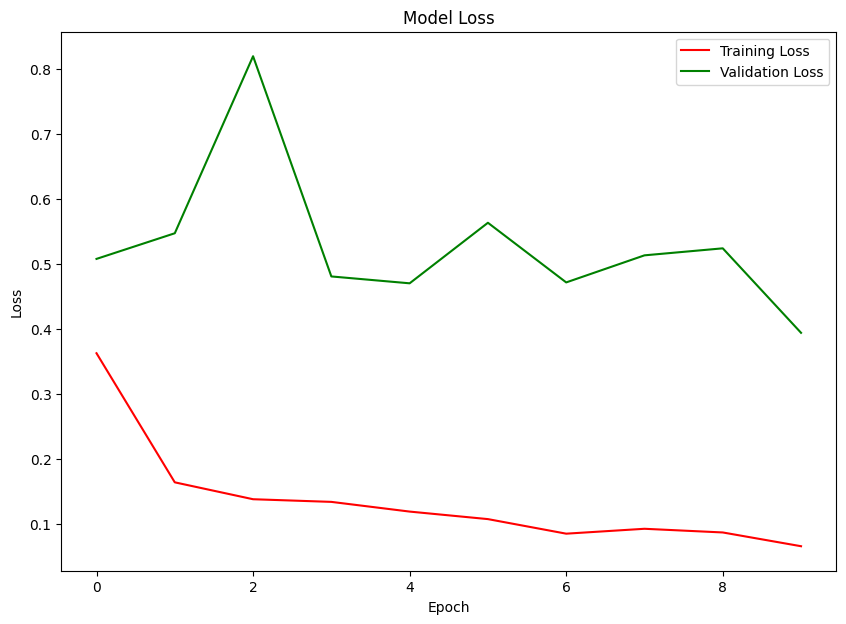

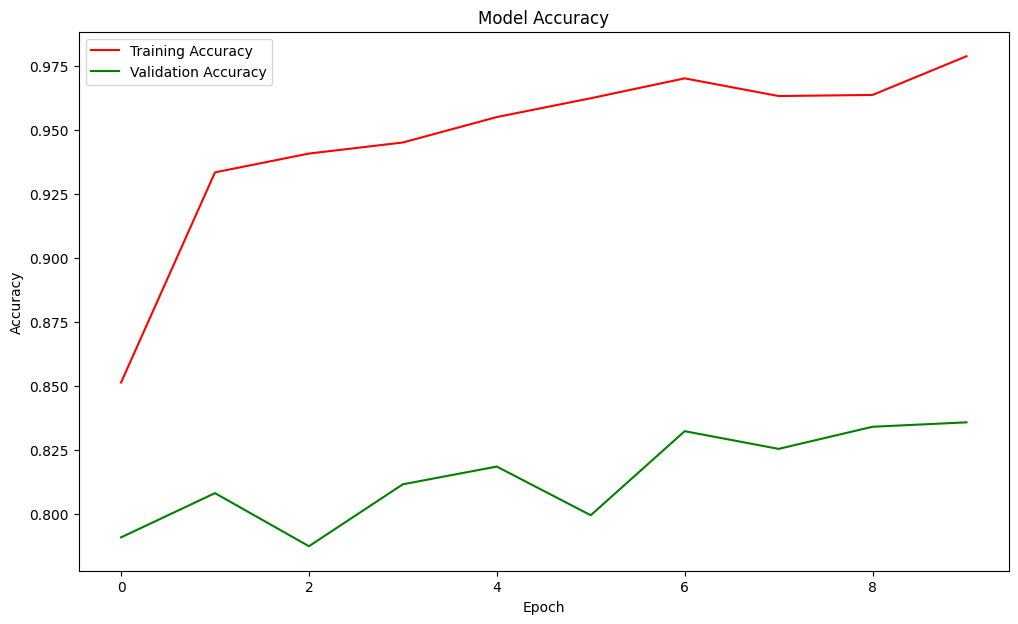

In [13]:
# Create a new figure and axes object
fig, ax = plt.subplots(figsize=(10, 7))

# Check if 'loss' and 'val_loss' are in history.history
if 'loss' in history.history:
    ax.plot(history.history['loss'], color='red', label='Training Loss')
if 'val_loss' in history.history:
    ax.plot(history.history['val_loss'], color='green', label='Validation Loss')

# Add labels and legend
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

# Show plot
plt.show()

if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')

# Plot validation accuracy
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')

# Add labels and legend
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



# With Pre-processing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_shape=(224,224,3)
# Define ImageDataGenerator for both training and validation sets
image_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Generate data flow from directory, split into training and validation sets
train_generator_proc = image_gen.flow_from_directory(
    directory='preprocessed_dataset',
    target_size=img_shape[:2],
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Specify training subset
    shuffle=True
)

validation_generator_proc = image_gen.flow_from_directory(
    directory='preprocessed_dataset',
    target_size=img_shape[:2],
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Specify validation subset
    shuffle=False
)

Found 2316 images belonging to 3 classes.
Found 579 images belonging to 3 classes.


In [5]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit_generator(
    train_generator_proc,
    steps_per_epoch=len(train_generator_proc),
    epochs=10,
    validation_data=validation_generator_proc,
    validation_steps=len(validation_generator_proc)
)


C:\Users\avisi\AppData\Local\Temp\ipykernel_15812\3611175737.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
73/73 [==============================] - 754s 10s/step - loss: 0.1222 - accuracy: 0.9598 - val_loss: 0.0567 - val_accuracy: 0.9775
Epoch 2/10
73/73 [==============================] - 751s 10s/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0162 - val_accuracy: 0.9948
Epoch 3/10
73/73 [==============================] - 755s 10s/step - loss: 0.0137 - accuracy: 0.9974 - val_loss: 0.0602 - val_accuracy: 0.9879
Epoch 4/10
73/73 [==============================] - 751s 10s/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.0321 - val_accuracy: 0.9896
Epoch 5/10
73/73 [==============================] - 1152s 16s/step - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.0319 - val_accuracy: 0.9845
Epoch 6/10
73/73 [==============================] - 729s 10s/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0327 - val_accuracy: 0.9896
Epoch 7/10
73/73 [==============================] - 456s 6s/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0079 - val_accuracy: 0.9983
Epoch 

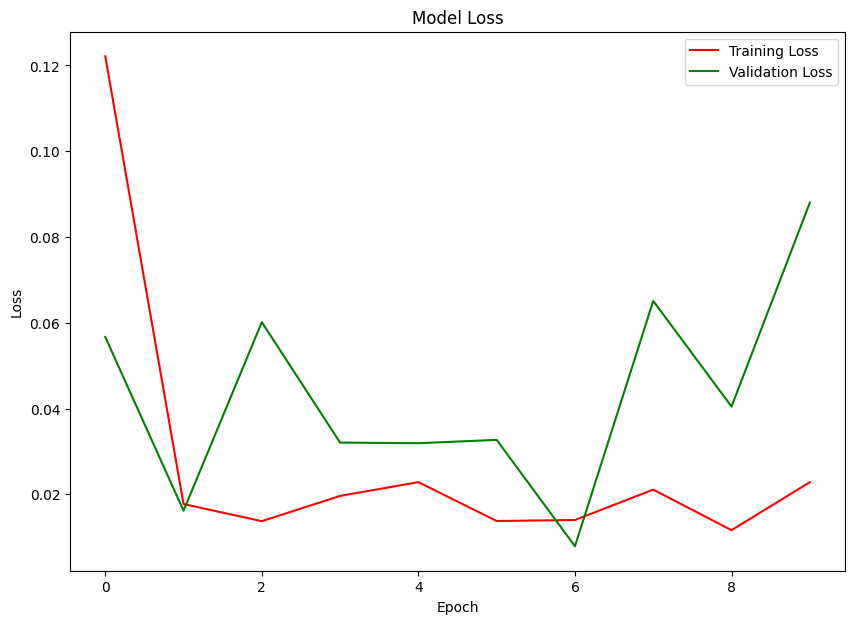

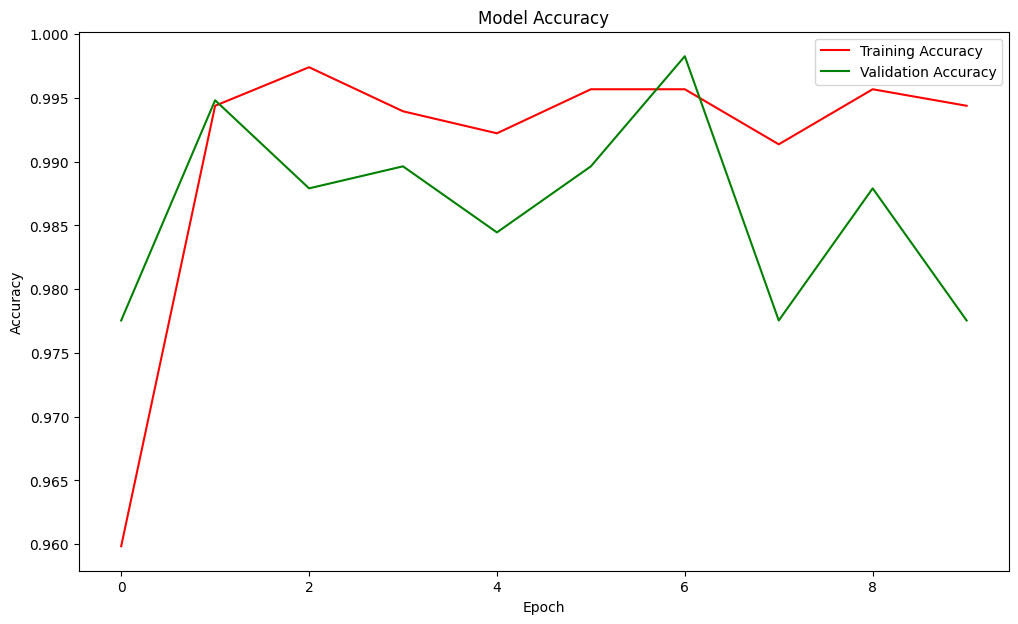

In [6]:
# Create a new figure and axes object
fig, ax = plt.subplots(figsize=(10, 7))

# Check if 'loss' and 'val_loss' are in history.history
if 'loss' in history.history:
    ax.plot(history.history['loss'], color='red', label='Training Loss')
if 'val_loss' in history.history:
    ax.plot(history.history['val_loss'], color='green', label='Validation Loss')

# Add labels and legend
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

# Show plot
plt.show()

if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')

# Plot validation accuracy
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')

# Add labels and legend
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

